# **LOADING DATA**

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
from keras.preprocessing import image
import math, cv2, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# upload kaggle.json yang didapatkan dari akun kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"subarkah","key":"14daeb6d95f8cfd854e705d18302bc56"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# download dataset dari kaggle

!kaggle datasets download -d rahmalisaaulia/corndiseases

 93% 113M/122M [00:03<00:00, 39.9MB/s]
100% 122M/122M [00:03<00:00, 33.8MB/s]


In [ ]:
# unzip file

from zipfile import ZipFile
file_name = '/content/corndiseases.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()

# **PREPROCESSING**

In [ ]:
train_dataset_path = "/content/Plant Diseases/train"
test_dataset_path = "/content/Plant Diseases/valid"

In [ ]:
# data augmentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30, 
                                   zoom_range=0.2,
                                   horizontal_flip=True, 
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
final_size = (224, 224)
final_batch = 32

In [ ]:
train_set = train_datagen.flow_from_directory(train_dataset_path,
                                                 target_size = final_size,
                                                 batch_size = final_batch,
                                                 class_mode = 'categorical')

Found 7316 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_dataset_path,
                                                 target_size = final_size,
                                                 batch_size = final_batch,
                                                 class_mode = 'categorical')

Found 1829 images belonging to 4 classes.


# **MODELLING**

# **Membuat Arsitektur CNN**

In [ ]:
# arsitektur model

cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', input_shape=(224, 224, 3), padding='same', strides=(1,1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same', strides=(1,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same', strides=(1,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same',strides=(1,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same',strides=(1,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
opt = Adam(
    lr=0.001, 
    #momentum=0.9
)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Mengcompile model
cnn_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy']
)

**ADDING TWEAKS**

In [ ]:
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=4,
)

In [ ]:
num_epochs = 6
cnn_hist = cnn_model.fit(train_set,  
                         epochs=num_epochs, 
                         validation_data = test_set, 
                         verbose=2, 
                         steps_per_epoch = len(train_set),
                         validation_steps = len(test_set), 
                         callbacks = early_stop)

Epoch 1/6
229/229 - 158s - loss: 0.6541 - accuracy: 0.7027 - val_loss: 0.6155 - val_accuracy: 0.7840 - 158s/epoch - 692ms/step
Epoch 2/6
229/229 - 133s - loss: 0.2521 - accuracy: 0.8998 - val_loss: 0.5802 - val_accuracy: 0.8327 - 133s/epoch - 580ms/step
Epoch 3/6
229/229 - 133s - loss: 0.2181 - accuracy: 0.9135 - val_loss: 0.1935 - val_accuracy: 0.9229 - 133s/epoch - 579ms/step
Epoch 4/6
229/229 - 133s - loss: 0.1591 - accuracy: 0.9377 - val_loss: 0.1360 - val_accuracy: 0.9497 - 133s/epoch - 583ms/step
Epoch 5/6
229/229 - 132s - loss: 0.1544 - accuracy: 0.9378 - val_loss: 0.1666 - val_accuracy: 0.9295 - 132s/epoch - 578ms/step
Epoch 6/6
229/229 - 132s - loss: 0.1304 - accuracy: 0.9472 - val_loss: 0.1121 - val_accuracy: 0.9590 - 132s/epoch - 577ms/step


**VISUALISASI**

In [ ]:
y_pred = cnn_model.predict(test_set)

58/58 [==============================] - 11s 192ms/step


In [ ]:
y_pred

array([[1.4135230e-10, 1.0000000e+00, 1.0956446e-15, 3.5797100e-34],
       [2.1443755e-05, 1.9721244e-06, 2.8983974e-05, 9.9994767e-01],
       [3.5279254e-06, 2.3064979e-07, 4.3116602e-06, 9.9999189e-01],
       ...,
       [3.6143852e-11, 1.0000000e+00, 1.9479789e-18, 6.6966833e-28],
       [1.3233467e-02, 1.7981100e-07, 9.8676193e-01, 4.4361045e-06],
       [9.6844202e-01, 4.6629998e-06, 3.1256188e-02, 2.9722997e-04]],
      dtype=float32)

# **UPLOAD GAMBAR**

Saving common-rust.jpg to common-rust.jpg
1/1 [==============================] - 0s 15ms/step
Tanamanmu Jagung terkena penyakit Leaf Blight


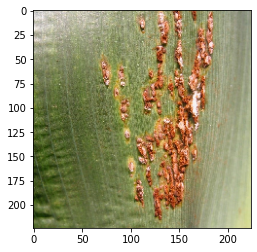

In [ ]:
from tensorflow.keras.preprocessing import image 

uploaded = files.upload()

for fn in uploaded.keys():
 
      
      img_path = fn
      img = image.load_img(img_path, target_size=(224, 224))
      imgplot = plt.imshow(img)
      
      # Preprocessing image
      x = image.img_to_array(img)
     
      # Scaling
      x = x/255
      x = np.expand_dims(x, axis=0)
    
      
      preds = cnn_model.predict(x)
      preds=np.argmax(preds, axis=1)

      if preds==0: #Corn_(maize)_Cercospora_leaf_spot Gray_leaf_spot
          preds="Tanamanmu Jagung terkena penyakit Gray_leaf_spot"
      elif preds==1: #Corn_(maize)_Common_rust
          preds="Tanamanmu Jagung terkena penyakit Common Rust"
      elif preds==2: #Corn_(maize)_Northern_Leaf_Blight
          preds="Tanamanmu Jagung terkena penyakit Leaf Blight"
      else: 
          preds="Yey tanamanmu Jagung sehat, pertahankan"
          
      print(preds)

# **SAVE MODEL**

In [ ]:
cnn_model.save_weights('model_corn_disease_weight.h5')

In [ ]:
# save ke json

model_json = cnn_model.to_json()
with open('model_corn_disease_1.json', 'w') as json_file:
    json_file.write(model_json)

In [ ]:
# save ke h5 file
from tensorflow.keras.models import load_model

cnn_model.save('model_corn_disease.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
!cp -r '/content/model_corn_disease_weight.h5' '/content/drive/MyDrive/corn_disease'

In [ ]:
!cp -r '/content/model_corn_disease_1.json' '/content/drive/MyDrive/corn_disease'

COMPRESS

In [ ]:
!pip uninstall -yq tensorflow
!pip uninstall -yq tf-nightly
!pip install -Uq tf-nightly-gpu
!pip install -q tensorflow-model-optimization

     |████████████████████████████████| 558.0 MB 25 kB/s 
     |████████████████████████████████| 439 kB 71.5 MB/s 
     |████████████████████████████████| 5.7 MB 56.2 MB/s 
     |████████████████████████████████| 1.7 MB 61.2 MB/s 


In [ ]:
!gdown 1l5n5MHdHLry_2cIiYe8LeQs_yWi_quVT
!gdown 1l0Bd0fAoV4ReEwzCbTCW4Ayb2RJZN5er

Downloading...
From: https://drive.google.com/uc?id=1l5n5MHdHLry_2cIiYe8LeQs_yWi_quVT
To: /content/model_corn_disease_1.json
100% 5.11k/5.11k [00:00<00:00, 9.57MB/s]
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1l0Bd0fAoV4ReEwzCbTCW4Ayb2RJZN5er 



In [ ]:
keras_file = "/content/corn_leaf_disease_models.h5"
num_train_samples = 000
batch_size = 32

In [ ]:
import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 32
epochs = 6
validation_split = 0.1 # 10% of training set will be used for validation set. 

num_images = train_images.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_for_pruning.summary()

In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

_, pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', pruned_keras_file)